# **CLUSTERING ANALYSIS**

Data Preprocessing:

In [ ]:
#1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [1]:
import pandas as pd
from pandas import*

In [13]:
import numpy as np
from numpy import*

In [12]:
from scipy import stats

In [15]:
from sklearn.preprocessing import StandardScaler

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import*

In [19]:
import seaborn as sns
from seaborn import*

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [7]:
data=read_excel('EastWestAirlines.xlsx',sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
data.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [11]:
data=data.drop_duplicates()
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [14]:
#Outliers
numerical_columns=data.select_dtypes(include=['int64'])
z_scores=stats.zscore(numerical_columns)
abs_z_score=abs(z_scores)
outliers=(abs_z_score>3).all(axis=1)
print(f'Number of Outlier Rows :{outliers.sum()}')

Number of Outlier Rows :0


In [16]:
scaler=StandardScaler()
data_standardized=scaler.fit_transform(data)

In [17]:
numerical_columns=data.select_dtypes(include=['int64'])
numerical_columns

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


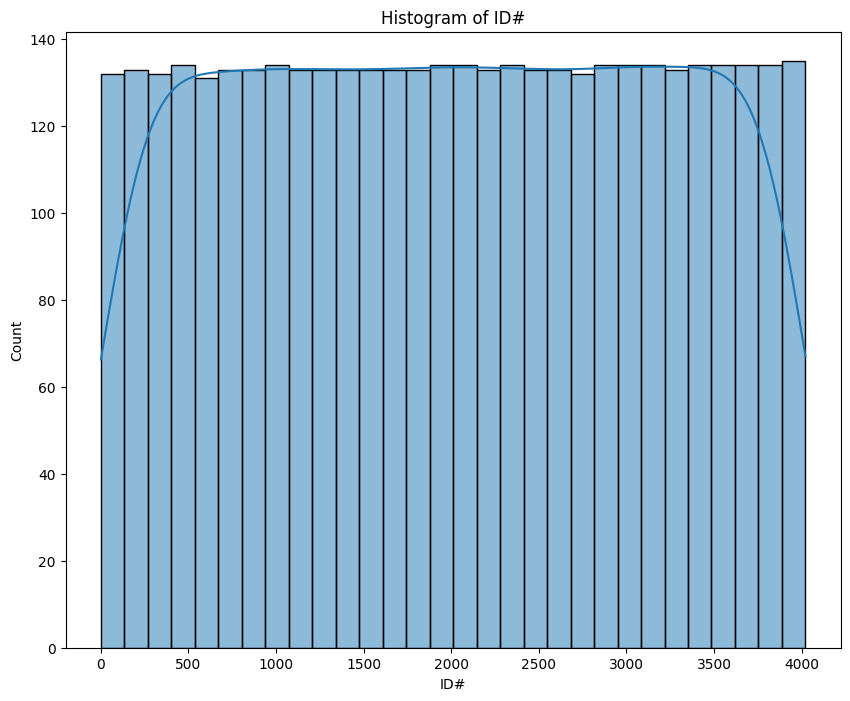

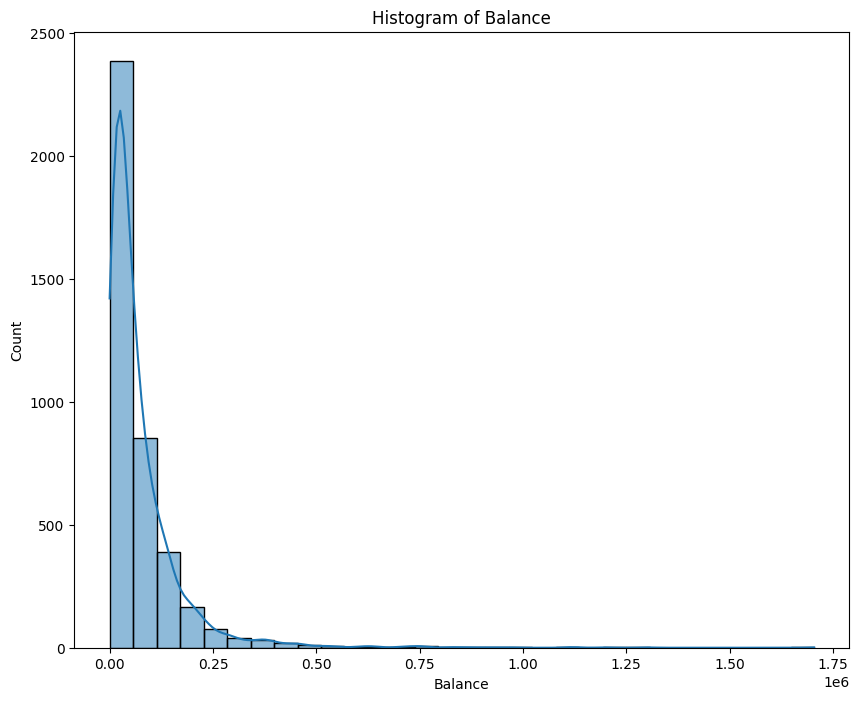

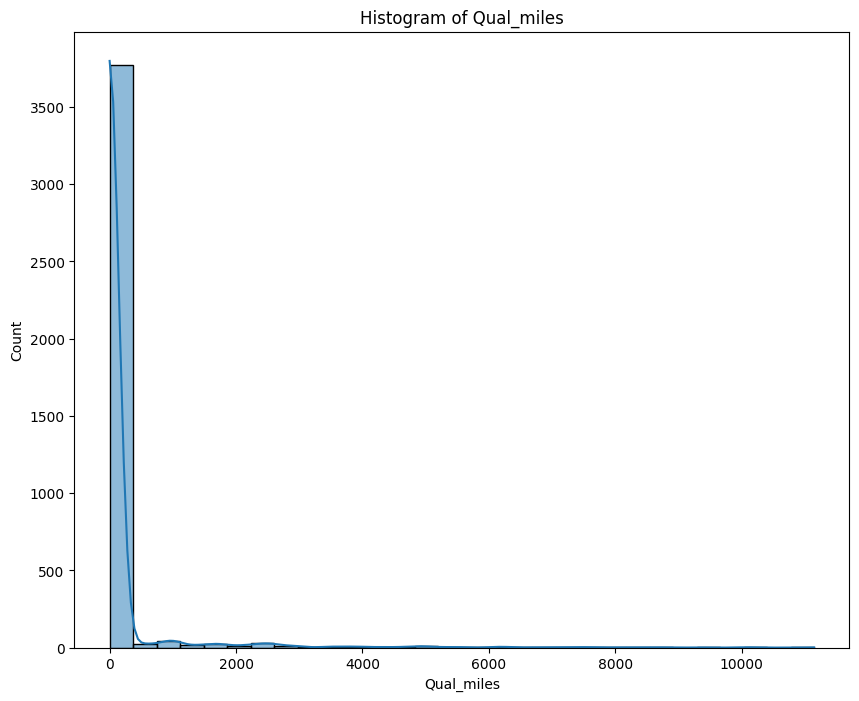

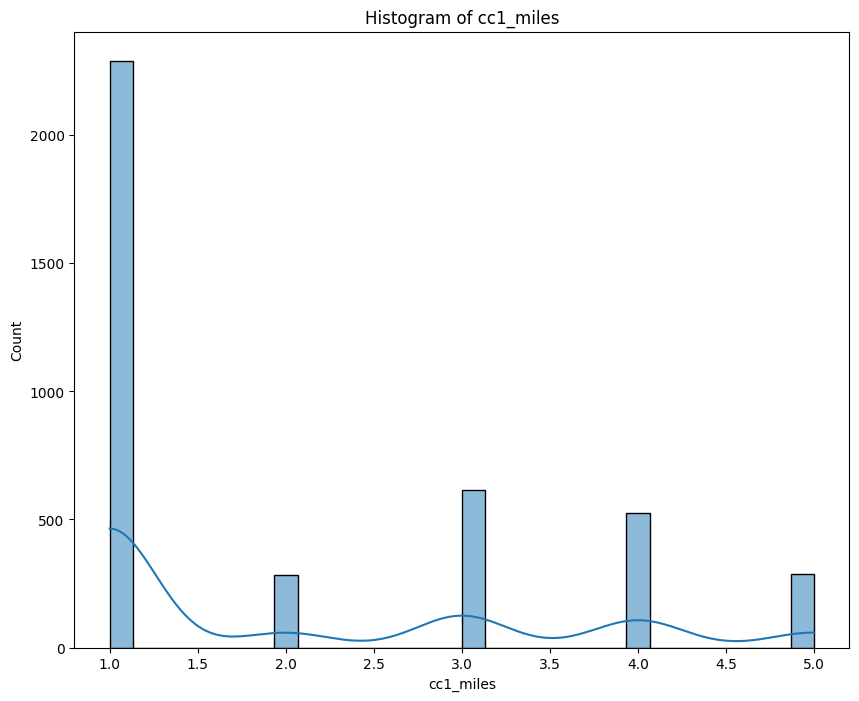

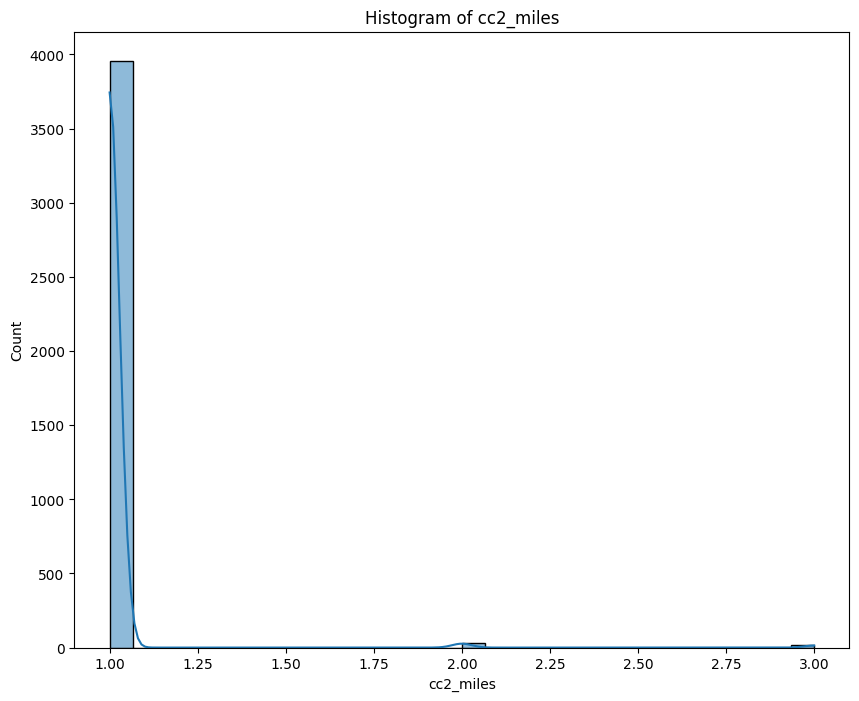

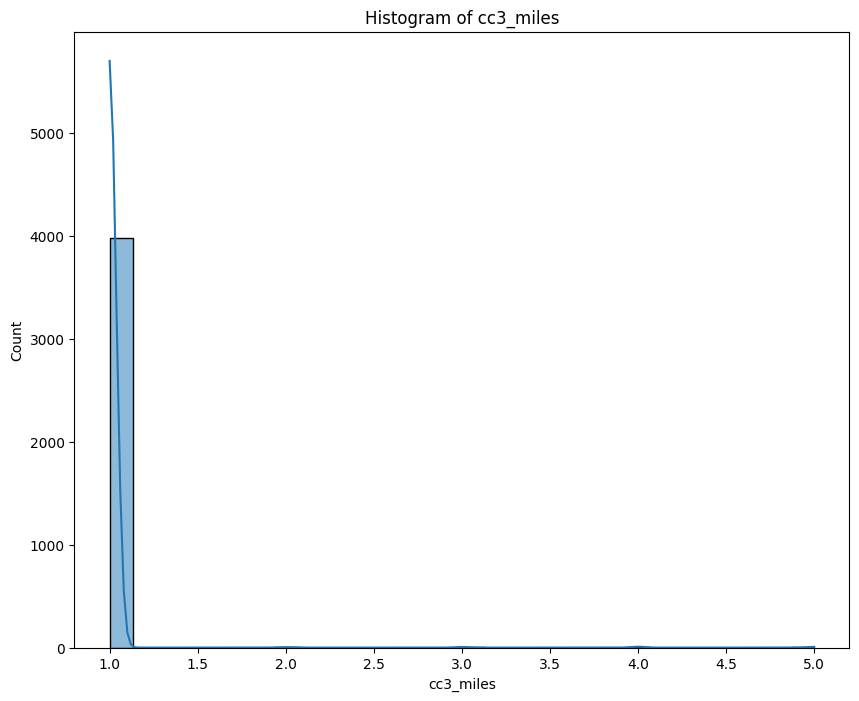

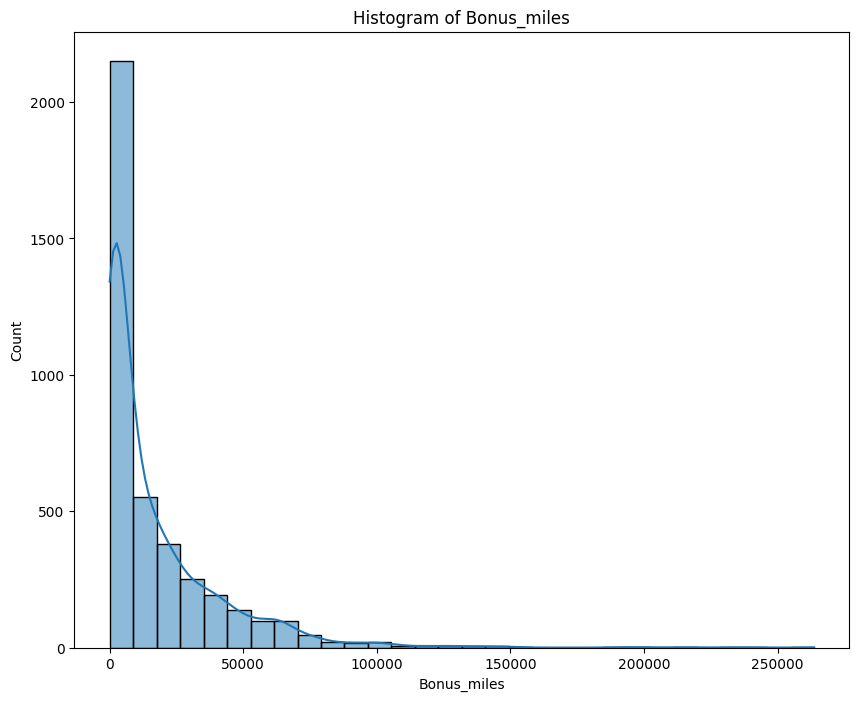

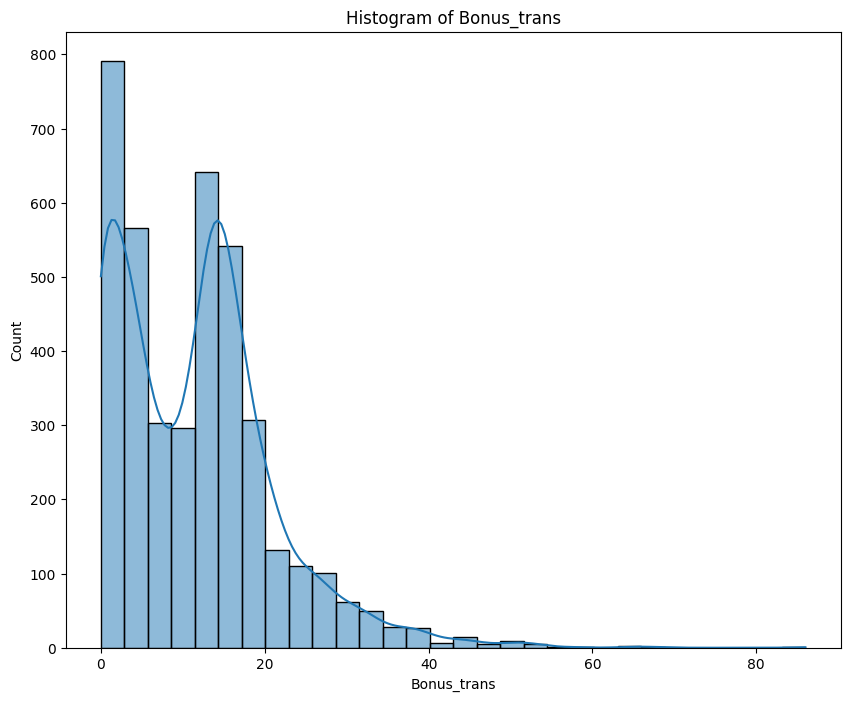

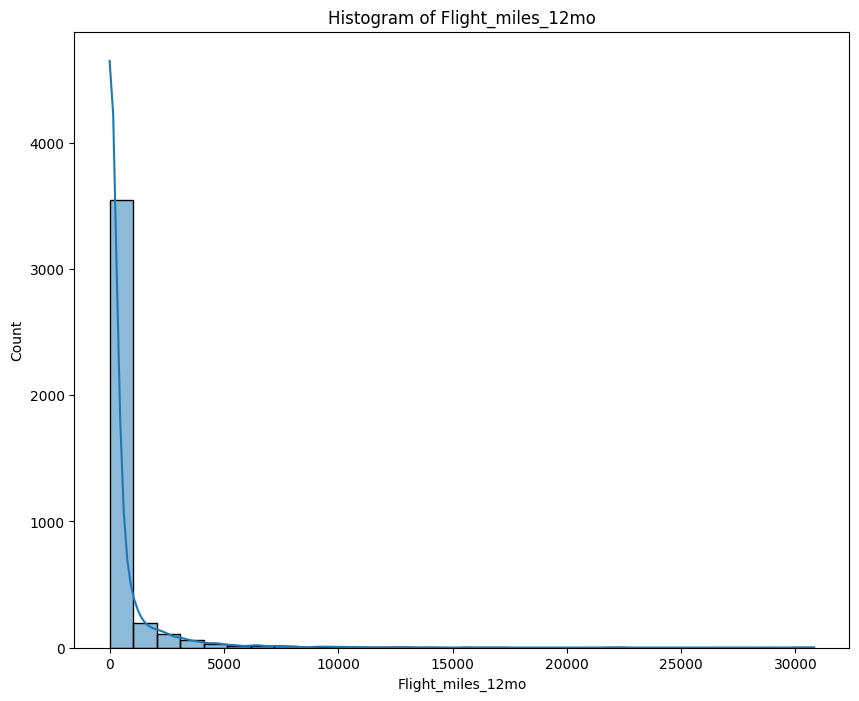

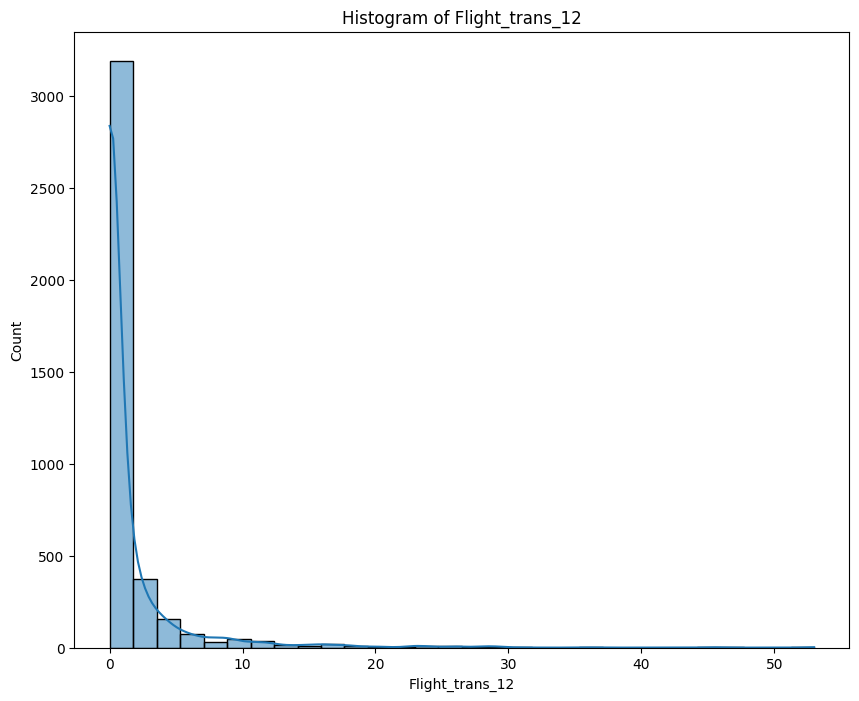

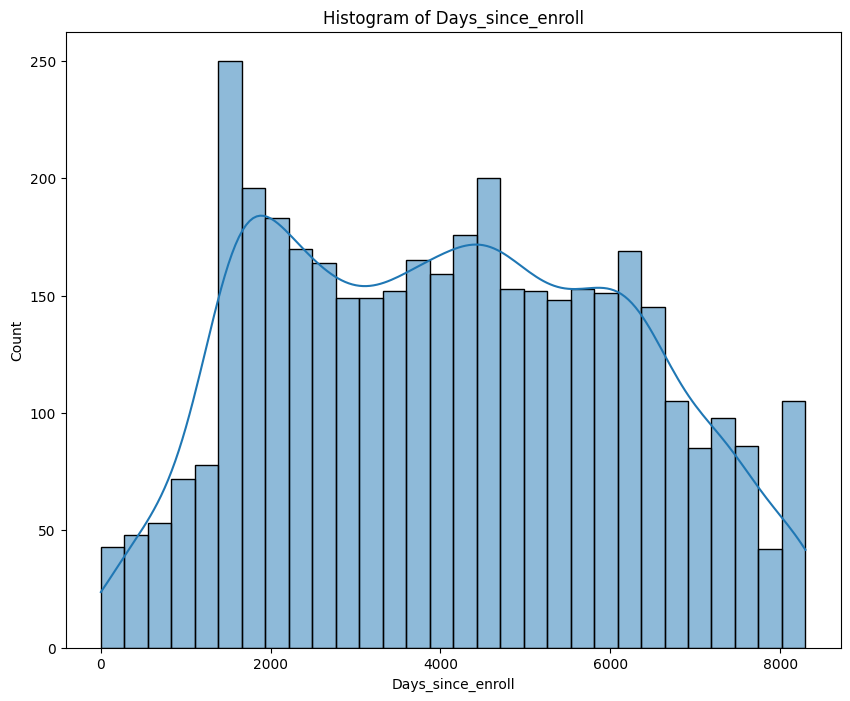

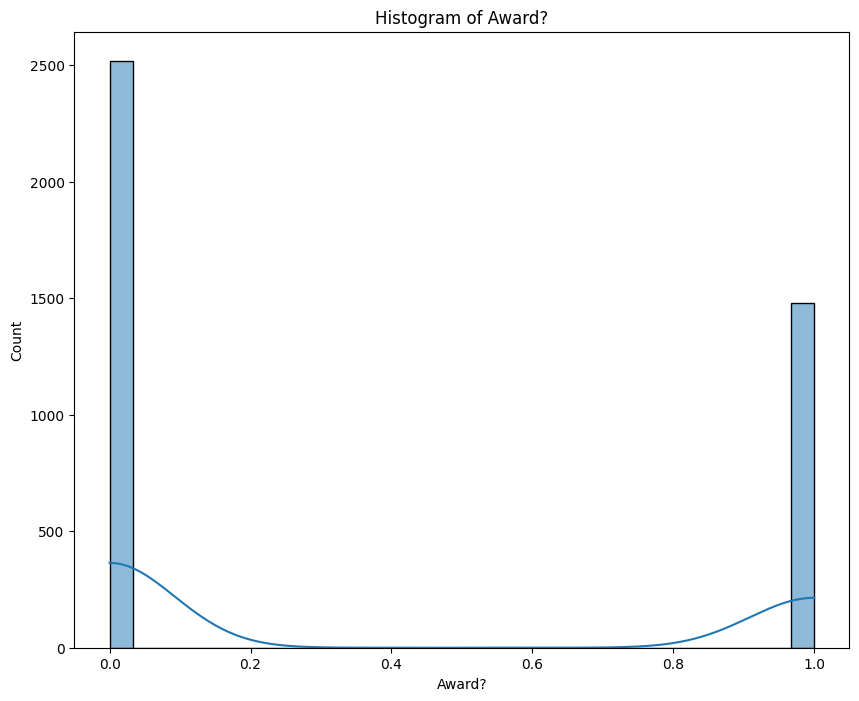

In [21]:
#Histogram for numerical features
for column in numerical_columns.columns:
  figure(figsize=(10,8))
  histplot(data[column],bins=30,kde=True)
  title(f'Histogram of {column}')
  show()

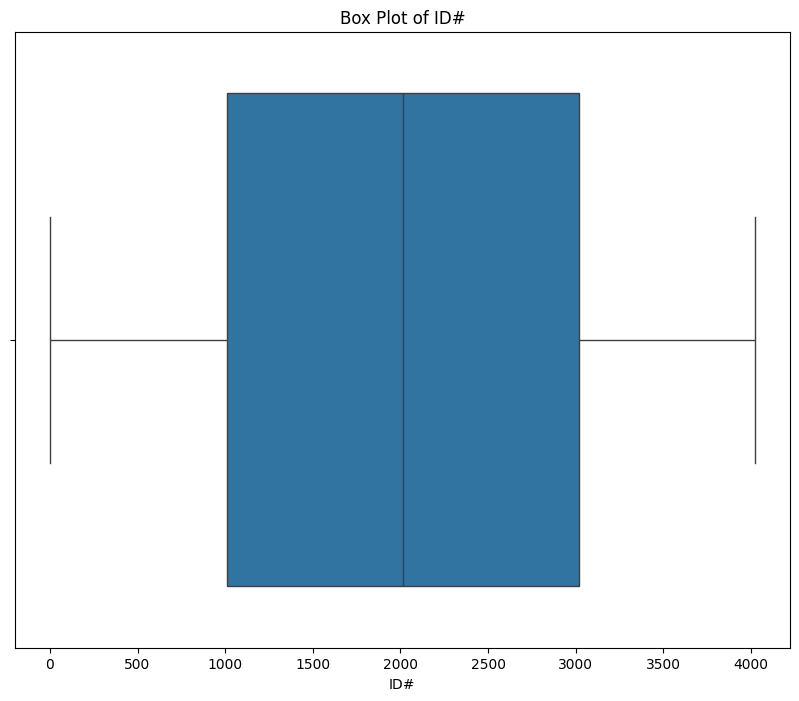

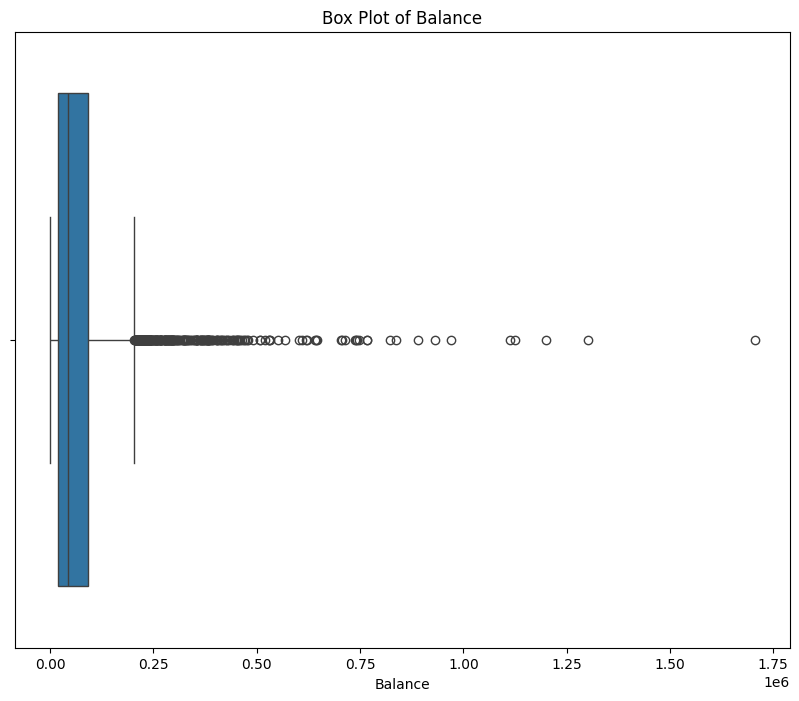

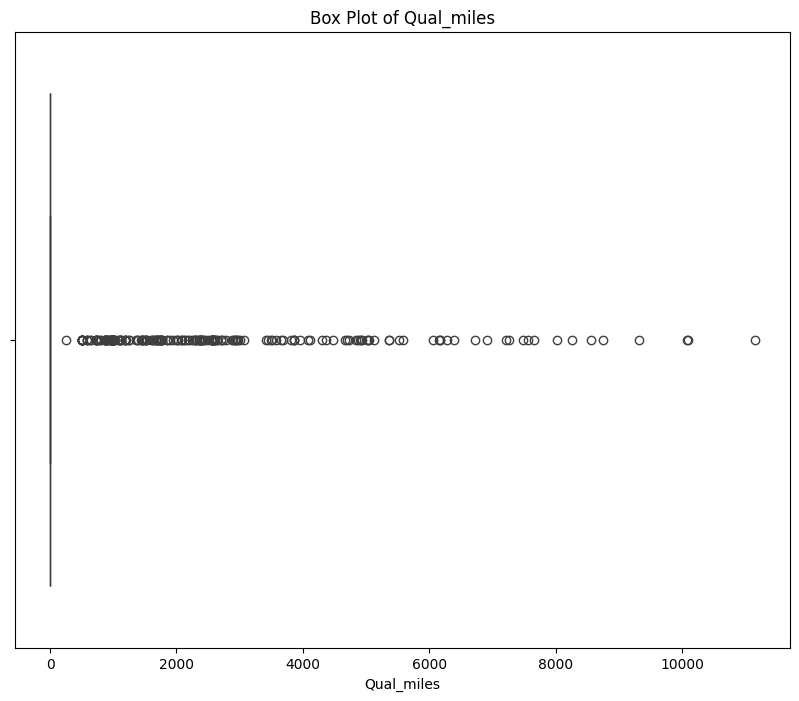

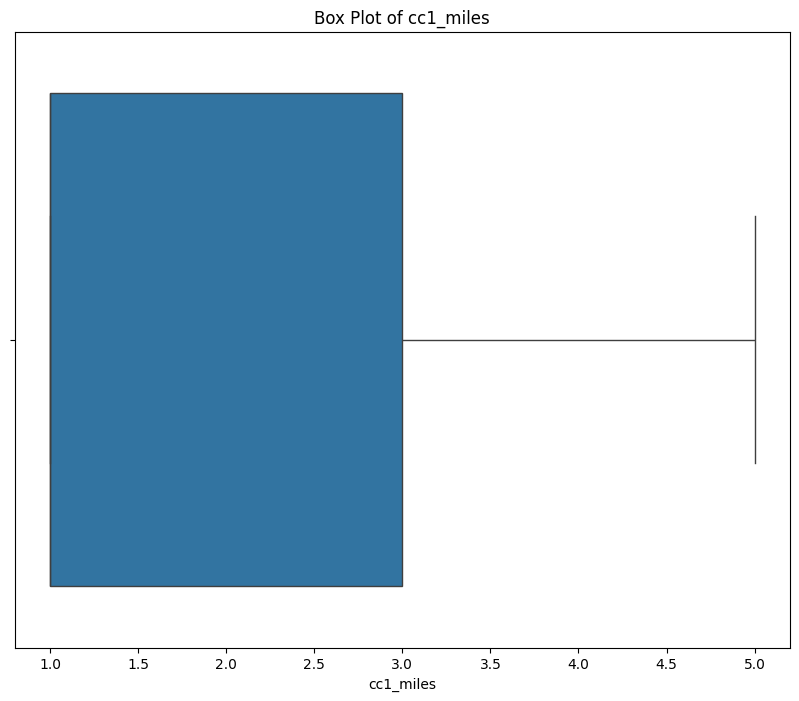

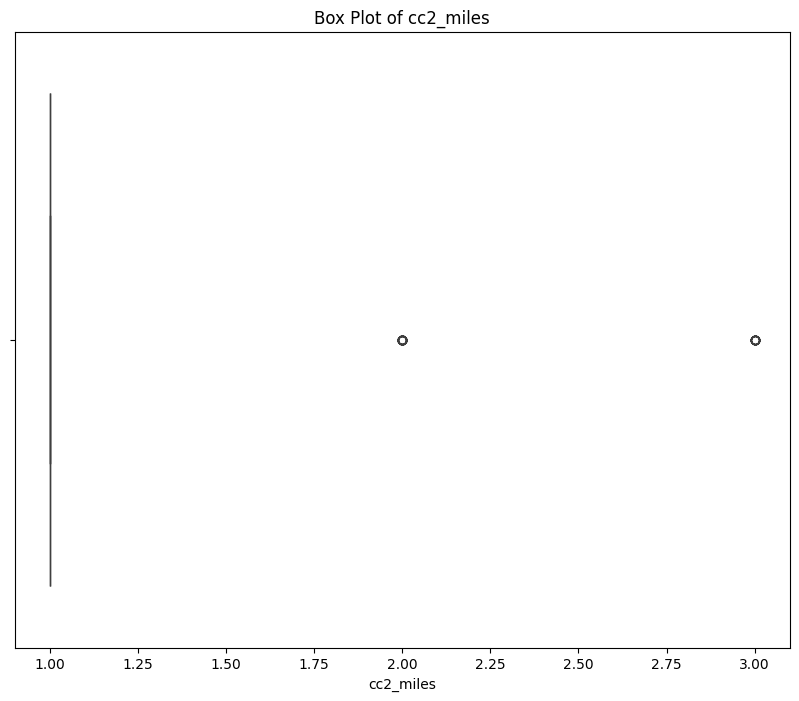

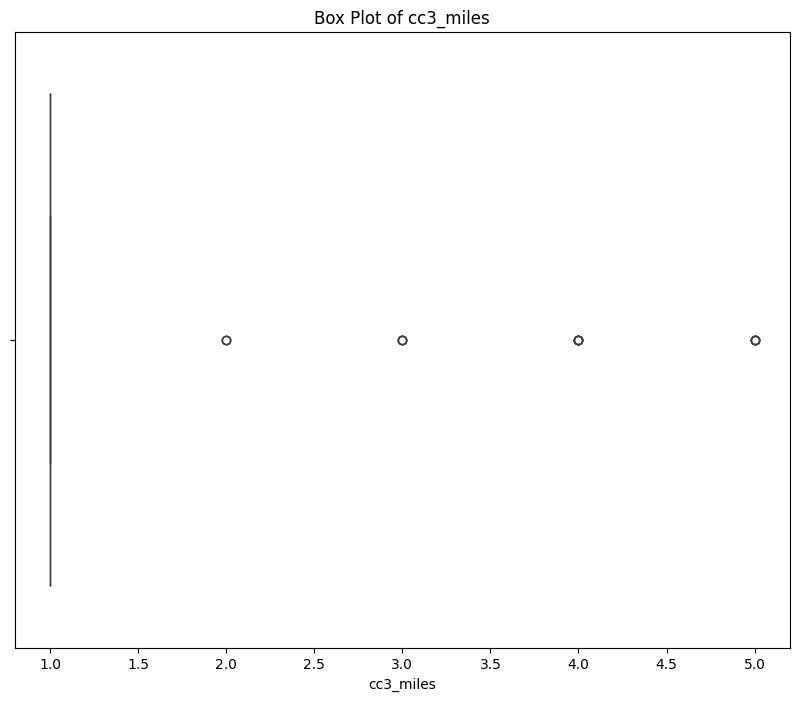

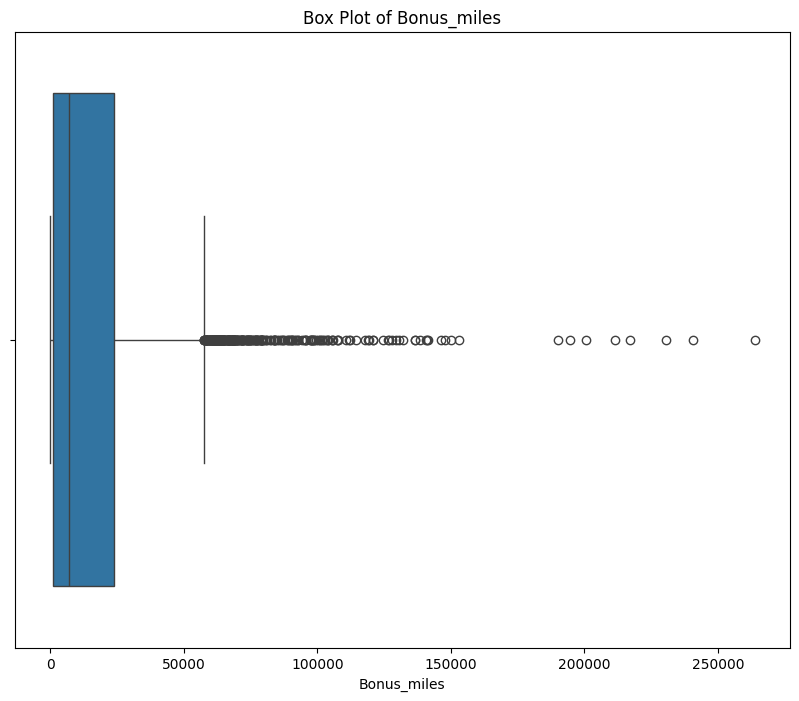

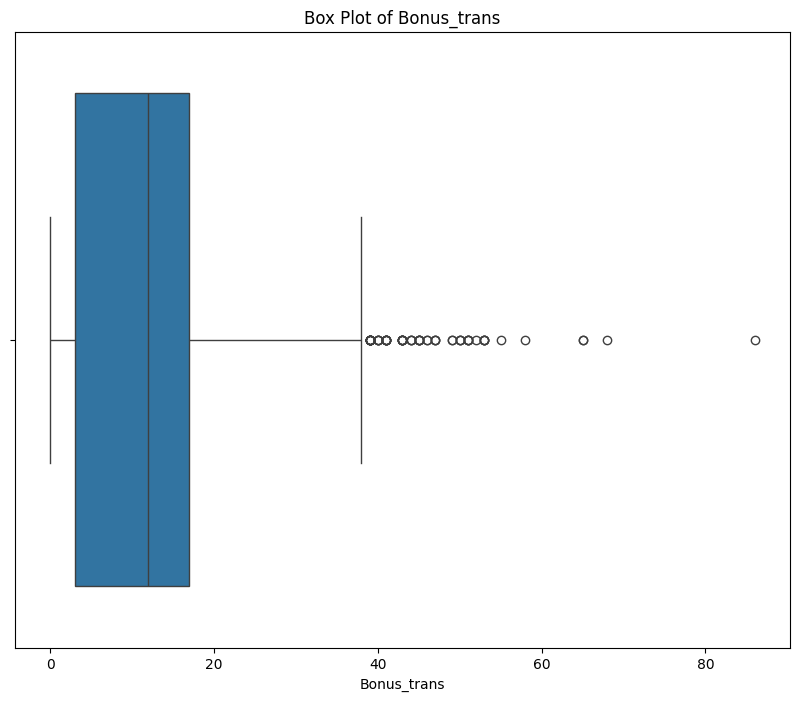

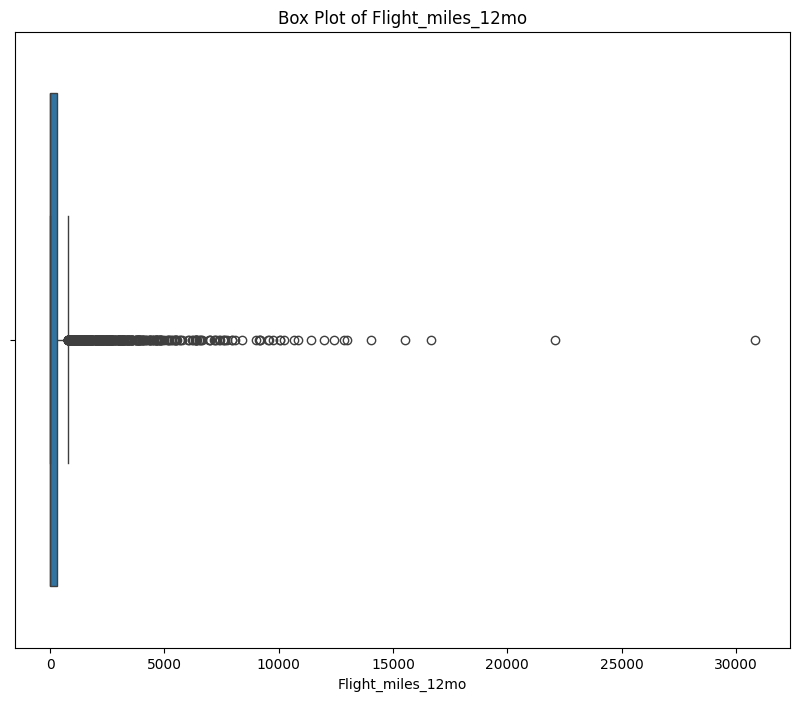

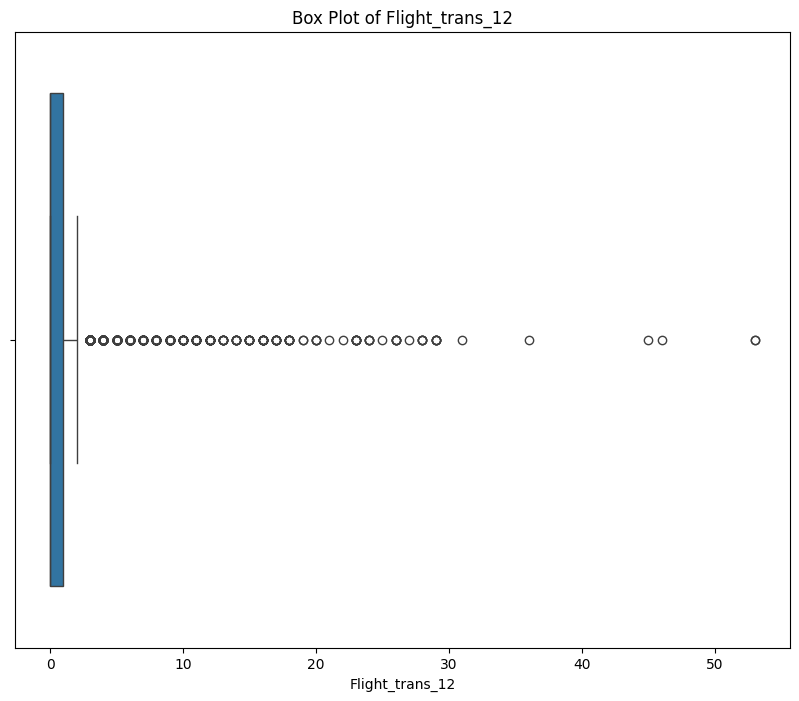

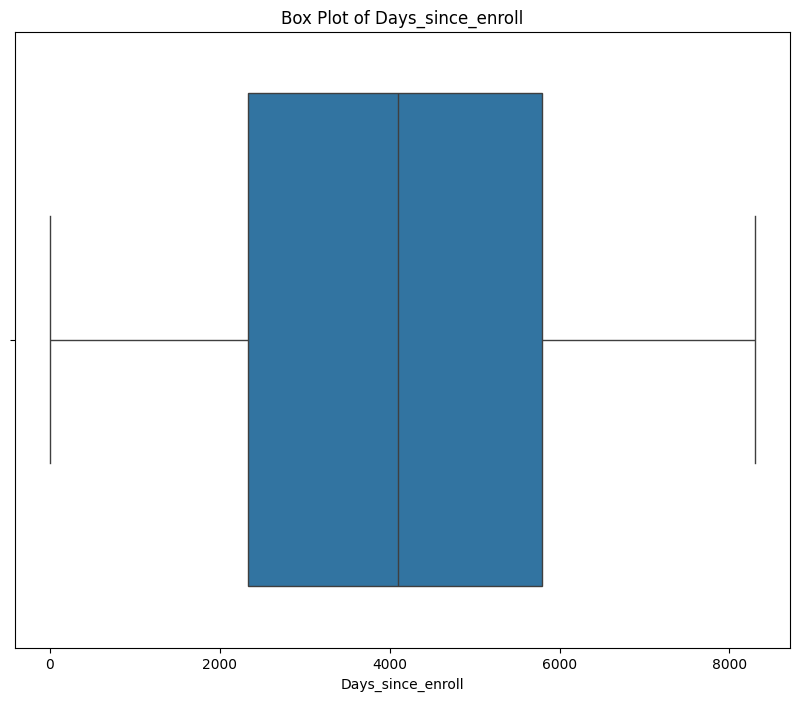

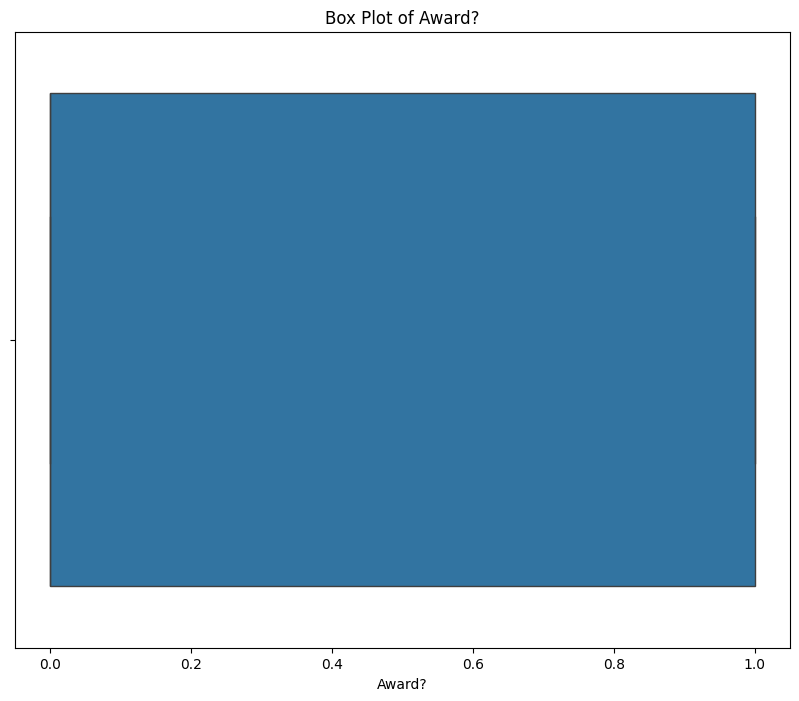

In [22]:
#Box plot for numerical features
for column in numerical_columns.columns:
  figure(figsize=((10,8)))
  boxplot(x=data[column])
  title(f'Box Plot of {column}')
  show()

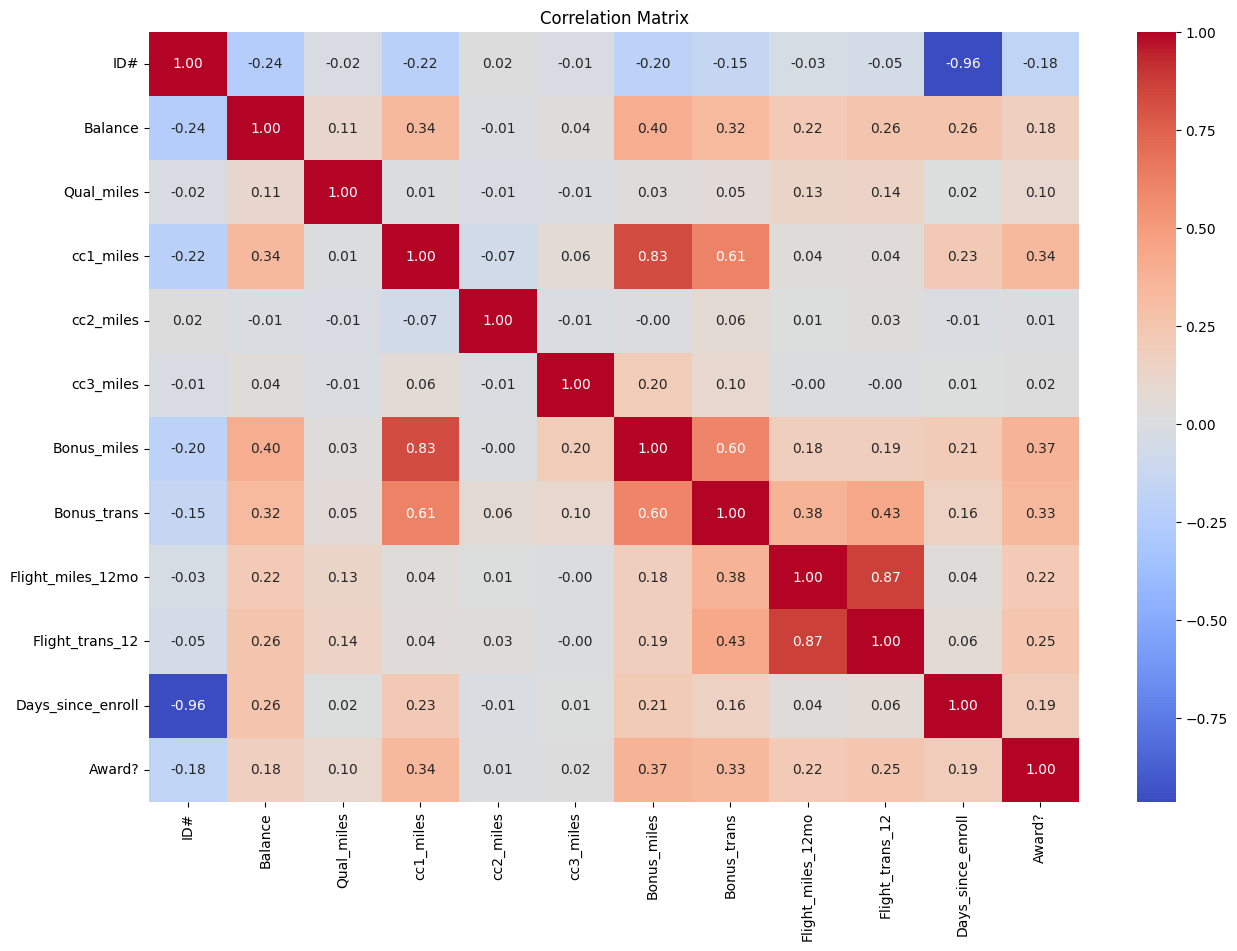

In [23]:
#correlation matrix
figure(figsize=(15,10))
correlation_matrix=numerical_columns.corr()
heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
title('Correlation Matrix')
show()

Implementing Clustering Algorithms:

In [ ]:
#•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

In [ ]:
#K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

In [30]:
from sklearn.metrics import silhouette_score

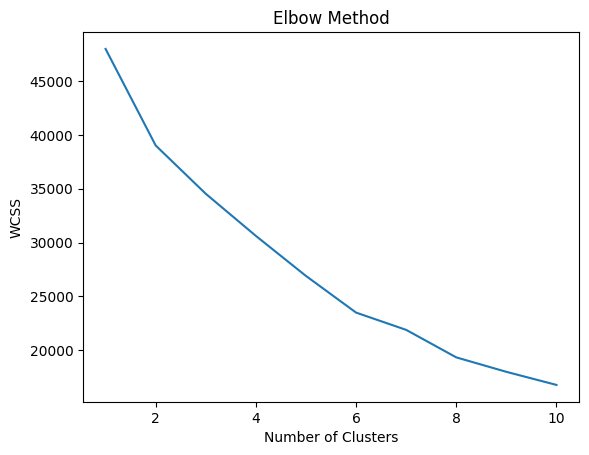

In [26]:
#Elbow method
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmean.fit(data_standardized)
  wcss.append(kmean.inertia_)
plot(range(1,11),wcss)
title('Elbow Method')
xlabel('Number of Clusters')
ylabel('WCSS')
show()

In [28]:
n_clusters=2
kmean=KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmean=kmean.fit_predict(data_standardized)
data['Cluster']=y_kmean
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


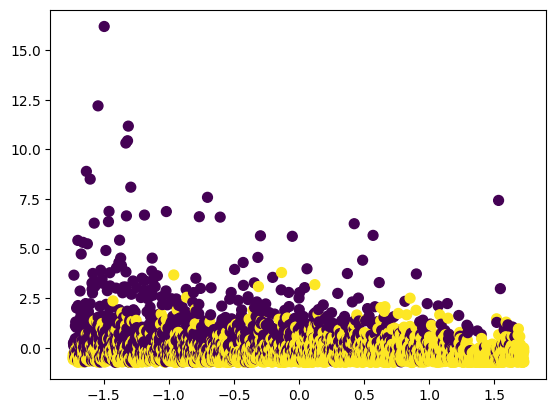

In [29]:
scatter(data_standardized[:,0],data_standardized[:,1],c=y_kmean,s=50,cmap='viridis')

In [31]:
kmean_scor=silhouette_score(data_standardized,kmean.labels_)
print(f'K-Means Silhouette Score : {kmean_scor}')

K-Means Silhouette Score : 0.29782139660896717


In [ ]:
#Hierarchical Clustering

In [33]:
from scipy.cluster.hierarchy import dendrogram,fcluster,linkage

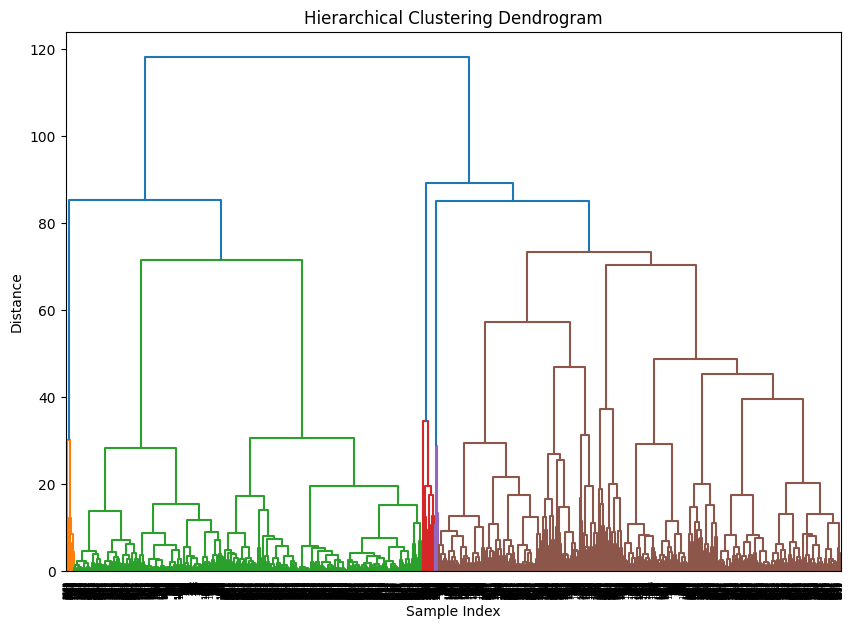

In [34]:
#Compute the linkage matrix
z=linkage(data_standardized,method='ward')
#plot the dendrogram
figure(figsize=(10,7))
dendrogram(z)
title('Hierarchical Clustering Dendrogram')
xlabel('Sample Index')
ylabel('Distance')
show()

In [35]:
n_cluster=3
cluster=fcluster(z,n_cluster,criterion='maxclust')

In [36]:
data['Hierarchical_Cluster']=cluster
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,Hierarchical_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1


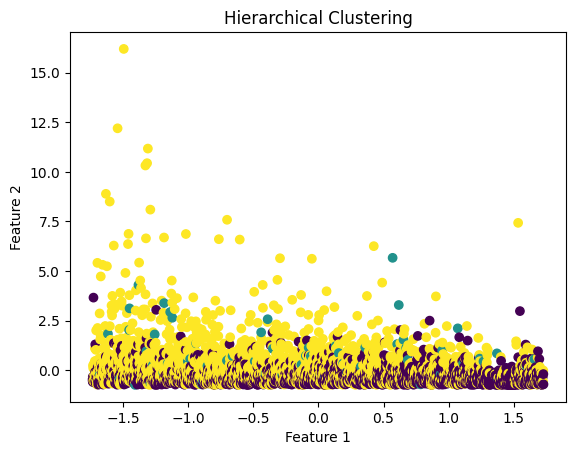

In [37]:
#Visualize the cluster
scatter(data_standardized[:,0],data_standardized[:,1],c=cluster,cmap='viridis')
xlabel('Feature 1')
ylabel('Feature 2')
title('Hierarchical Clustering')
show()

In [38]:
hierarchical_scor=silhouette_score(data_standardized,data['Hierarchical_Cluster'])
print(f'Hierarchical Silhouette Score : {hierarchical_scor}')

Hierarchical Silhouette Score : 0.20526614352218822


In [ ]:
#DBSCAN Clustering

In [39]:
from sklearn.cluster import DBSCAN

In [41]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_cluster=dbscan.fit_predict(data_standardized)

In [42]:
#Add cluster information to the dataframe
data['DBSCAN_Cluster']=dbscan_cluster
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,3,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,3,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,3,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,1,0


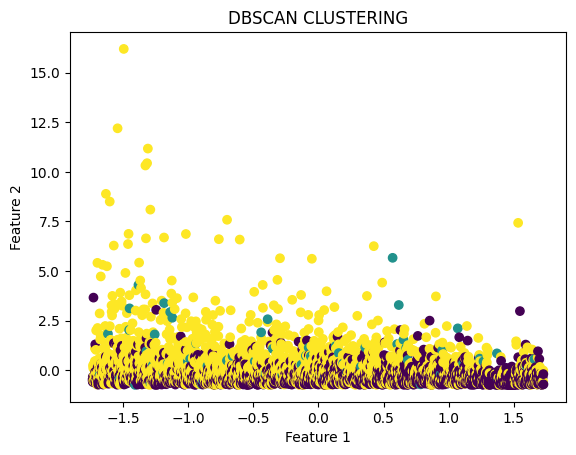

In [43]:
#visualize the cluster
scatter(data_standardized[:,0],data_standardized[:,1],c=cluster,cmap='viridis')
xlabel('Feature 1')
ylabel('Feature 2')
title('DBSCAN CLUSTERING')
show()

In [44]:
dbscan_scor=silhouette_score(data_standardized,data['DBSCAN_Cluster'])
print(f'DBSCAN Silhouette Score : {dbscan_scor}')

DBSCAN Silhouette Score : -0.2823258834687895
